# Classification and Clustering 

## A Toy Example

We assume that dataset is generated from different Gaussian multivariate distributions. 


In [1]:
import warnings
warnings.filterwarnings('ignore')

### Plots
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
bounds = np.linspace(-1, 3, 10)
normcolor = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
##########
from scipy.stats import multivariate_normal as mvnorm
from scipy.stats import norm

We first fix mean values and covariance matrices corresponding to each class as well as their labels. Three mean values are selected currently for the dataset.

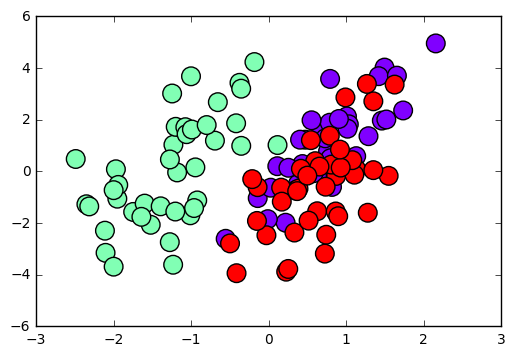

In [2]:
# Ambient dimension
p=2
# Number of elements in each class
n1=40 
n2=40
n3=40
#### Labels
color=np.concatenate((0*np.ones(n1,),1*np.ones(n2,),2*np.ones(n3,)),
                     axis=0)[np.newaxis]
#### Mean values
# Either random
m1=norm.rvs(0,1,size=(p,))
m2=norm.rvs(0,1,size=(p,))
m3=norm.rvs(0,1,size=(p,))
# Or fixed
#m1= [1,2]
#m2=[-2,-1]
#m3=[-2,3]
#### Covariance matrix
temp= norm.rvs(0, 0.5, size=(p, p))
Sigma1 =  temp.T@temp
Sigma2 = Sigma1
Sigma3 = Sigma1
#### Generate data
X1=mvnorm.rvs(m1, Sigma1, size=(n1, 1))
X2=mvnorm.rvs(m2, Sigma2, size=(n2, 1))
X3=mvnorm.rvs(m3, Sigma3, size=(n3, 1))
#### Build the dataset
X=np.concatenate((X1,X2,X3),axis=0)
Xlabeled=np.concatenate((X,color.T),axis=1)
xbar1=np.mean(X1,0)
xbar2=np.mean(X2,0)
xbar3=np.mean(X3,0)
xmean1=(xbar1+xbar2)/2
xmean2=(xbar1+xbar3)/2
xmean3=(xbar2+xbar3)/2
## Plot
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], s=180, c=color, cmap=plt.cm.rainbow)
plt.show()

Now the data is ready for further processing.

## Two-class classification

First, two classes are selected for classification. In that regard, Fisher's linear discriminant analysis (Fisher LDA) provides the same classifier as the maximum likelihood (ML) classifier. We first prepare the dataset.

In [3]:
X12=np.concatenate((X1,X2),axis=0)
y12=np.concatenate((0*np.ones(n1,),1*np.ones(n2,)),axis=0)[np.newaxis]

Before continuing, the centering  matrix $\mathbf E_n$ will be used to simplify the whole process.

In [4]:
#### Centering Matrix
def centering(n):
    return np.eye(n)-np.ones((n,n))/n


Furthermore the following function provides the Fisher LDA function.

In [5]:
def FisherLDA(a,mean_vector,Xinput):
    n_class=mean_vector.shape[0]
    Xtemp=np.tile(Xinput@a,(n_class,1))
    return np.argmin(np.abs(Xtemp.T-mean_vector@a),axis=1)

The following building block implement the Fisher's linear discriminant analysis.

In [6]:
from numpy import linalg as la

########################################
#### Fisher Linear Discriminant Analysis
########################################
E=centering(n1+n2)
E1=centering(n1)
E2=centering(n2)
W=X1.T@E1@X1+X2.T@E2@X2
S=X12.T@E@X12
FLDAmat=la.inv(W)@S
#### Eigenvalue analysis
## Find the eigenvalues and eigenvectors
eigval, eigvec =la.eig(FLDAmat)
## Sort them in decreasing order
idx = eigval.argsort()[::-1]   	
eigval = eigval[idx]
eigvec = eigvec[:,idx]
a=eigvec[:,0]

The output of the classifier is presented as follows.

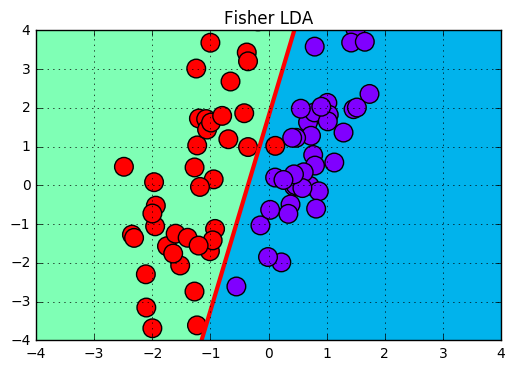

In [7]:
fig=plt.figure()
###################################
# Meshgrid of the classifier:
x_min = -4
x_max = 4
y_min=-4
y_max=4
nx, ny = 400, 200
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), 
                     np.linspace(y_min, y_max, ny))
Xmesh=np.array(np.c_[xx.ravel(), yy.ravel()])
Ymesh=FisherLDA(a,np.array([xbar1,xbar2]),Xmesh).reshape(xx.shape)
plt.pcolormesh(xx, yy, Ymesh, norm=normcolor, cmap=plt.cm.rainbow)
###################################
plt.scatter(X12[:,0], X12[:,1], s=180, c=y12, cmap=plt.cm.rainbow)
w,z=np.ogrid[-4:4:100j,-4:4:100j]
xmean1
g=a[1]*w+a[0]*z-a.T@xmean1
plt.contour(w.ravel(),z.ravel(),g,[0],linewidths=(3,), colors=('r',))
plt.title('Fisher LDA')
plt.grid(True)
plt.legend()
plt.axis([-4, 4, -4, 4])
plt.show()

## Fisher's  LDA versus Maximum Likelihood 

Now consider three classes for classification. Note that ML and Fisher LDA will have different outputs here. We start by training Fisher LDA model.

In [8]:
#########################################
#### Fisher Linear Discriminant Analysis
n=n1+n2+n3
E=centering(n)
E1=centering(n1)
E2=centering(n2)
E3=centering(n3)
W=X1.T@E1@X1+X2.T@E2@X2+X3.T@E3@X3
S=X.T@E@X
FLDAmat=la.inv(W)@S
#### Eigenvalue analysis
## Find the eigenvalues and eigenvectors
eigval, eigvec =la.eig(FLDAmat)
## Sort them in decreasing order
idx = eigval.argsort()[::-1]   
eigval = eigval[idx]
eigvec = eigvec[:,idx]
a=eigvec[:,0]

The output of the classifier is plotted in the following block.

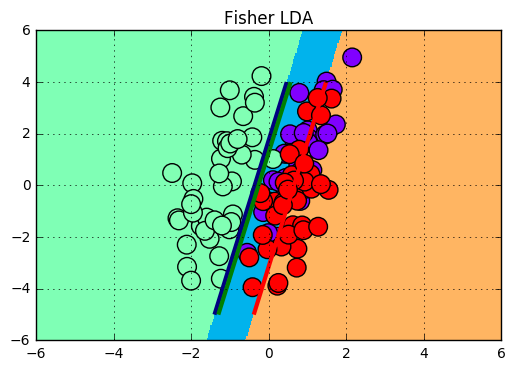

In [9]:
fig = plt.figure()
###################################
# Meshgrid of the classifier:
x_min = -6
x_max = 6
y_min=-6
y_max=6
nx, ny = 400, 200
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), 
                     np.linspace(y_min, y_max, ny))
Xmesh=np.array(np.c_[xx.ravel(), yy.ravel()])
Ymesh=FisherLDA(a,np.array([xbar1,xbar2,xbar3]),Xmesh).reshape(xx.shape)

plt.pcolormesh(xx, yy, Ymesh, norm=normcolor, cmap=plt.cm.rainbow)
#######################################
plt.scatter(X[:,0], X[:,1], s=180, c=color, cmap=plt.cm.rainbow)
w,z=np.ogrid[-5:4:100j,-5:4:100j]
g=a[1]*w+a[0]*z
baseline=plt.contour(w.ravel(),z.ravel(),g-a.T@xmean1,[0],linewidths=(3,))
plt.contour(w.ravel(),z.ravel(),g-a.T@xmean2,[0],linewidths=(3,), 
            colors=('r',))
plt.contour(w.ravel(),z.ravel(),g-a.T@xmean3,[0],linewidths=(3,),
            colors=('g',))
plt.title('Fisher LDA')
plt.grid(True)
plt.legend()
plt.axis([-6, 6, -6, 6])

plt.show()

Next step is to train ML classifier. The following block implements the ML discriminant analysis.

In [10]:
##############################################
#### ML Discriminant Analysis
Sigma =W/n
d1=xbar1-xbar2
d2=xbar1-xbar3
d3=xbar2-xbar3
a1=d1@la.inv(Sigma)
a2=d2@la.inv(Sigma)
a3=d3@la.inv(Sigma)
##############################################
## ML classifier
import scipy.linalg as sla

def MLDA(S,mean_vector,Xinput):
    n_class=mean_vector.shape[0]
    n_dimension=mean_vector.shape[1]
    n_instance=Xinput.shape[0]
    Xtemp0=np.tile(Xinput,(1,n_class))-mean_vector.ravel()
    Xtemp1=Xtemp0.reshape((n_instance*n_class,n_dimension)).T
    Xtemp2=sla.sqrtm(la.inv(S))@Xtemp1
    Xtemp3= la.norm(Xtemp2,axis=0)
    Xtemp4=Xtemp3.reshape((n_instance,n_class))
    return np.argmin(Xtemp4,axis=1)
##############################################


The output of ML classifier is ploted below.

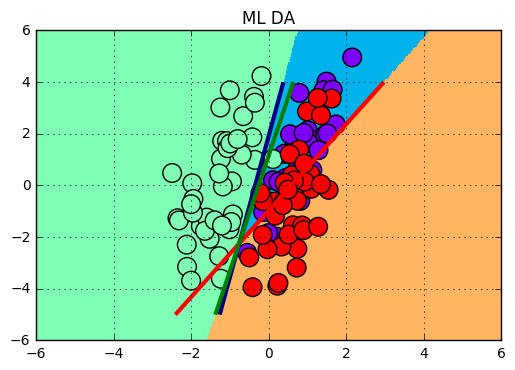

In [11]:
fig=plt.figure()
###################################
# Meshgrid of the classifier:
x_min = -6
x_max = 6
y_min=-6
y_max=6
nx, ny = 400, 200
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), 
                     np.linspace(y_min, y_max, ny))
Xmesh=np.array(np.c_[xx.ravel(), yy.ravel()])
Ymesh=MLDA(Sigma,np.array([xbar1,xbar2,xbar3]),Xmesh).reshape(xx.shape)
plt.pcolormesh(xx, yy, Ymesh, norm=normcolor, cmap=plt.cm.rainbow)
######################################
plt.scatter(X[:,0], X[:,1], s=180, c=color, cmap=plt.cm.rainbow)
w,z=np.ogrid[-5:4:100j,-5:4:100j]
g=a1[1]*w+a1[0]*z
plt.contour(w.ravel(),z.ravel(),a1[1]*w+a1[0]*z-a1.T@xmean1,[0]
            ,linewidths=(3,))
plt.contour(w.ravel(),z.ravel(),a2[1]*w+a2[0]*z-a2.T@xmean2,[0]
            ,linewidths=(3,), colors=('r',))
plt.contour(w.ravel(),z.ravel(),a3[1]*w+a3[0]*z-a3.T@xmean3,[0]
            ,linewidths=(3,), colors=('g',))
plt.title('ML DA')
plt.grid(True)
plt.legend()
plt.axis([-6, 6, -6, 6])
plt.show()

## K-Means Clustering 

We simply run K-meanse clustering algorithms for two and three clusters.

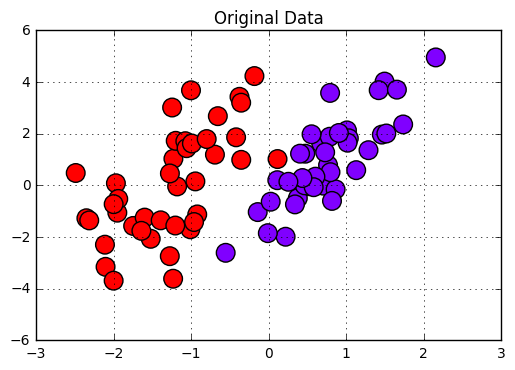

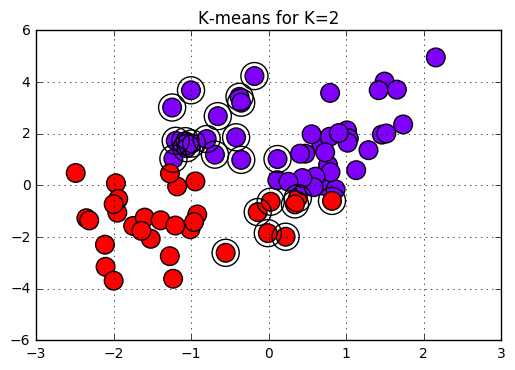

In [12]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2, random_state=0).fit(X12)
#################################################
## Detecting Correct Labels
ykmeans=kmeans.labels_
I=[i for i in range(n1+n2) if (y12[0,i]!=ykmeans[i])]
Xfalse=X12[I]
#################################################
## Plot
fig = plt.figure()
plt.scatter(X12[:,0], X12[:,1], s=180, c=y12, cmap=plt.cm.rainbow)
plt.title('Original Data')
plt.grid(True)
plt.legend()
plt.show()
########### 
fig = plt.figure()
plt.scatter(X12[:,0], X12[:,1], s=180, c=ykmeans, 
            cmap=plt.cm.rainbow)
plt.scatter(Xfalse[:,0], Xfalse[:,1], s=380, facecolors='none')

plt.title('K-means for K=2')
plt.grid(True)
plt.legend()
plt.show()

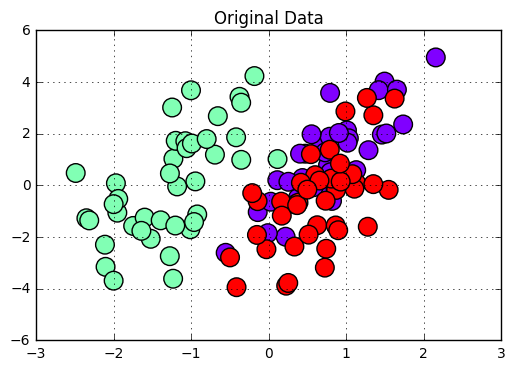

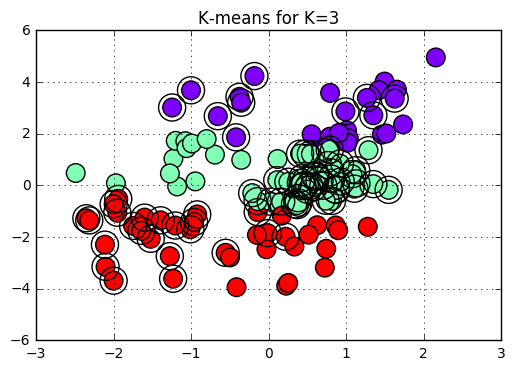

In [13]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=0).fit(X)
#################################################
## Detecting correct labels
ytemp=kmeans.labels_-1
ykmeans=[2 if ytemp[i]==-1 else ytemp[i] for i in range(n)]
I=[i for i in range(n) if (color[0,i]!=ykmeans[i])]
Xfalse=X[I]
#################################################
## Plot
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], s=180, c=color, cmap=plt.cm.rainbow)
plt.title('Original Data')
plt.grid(True)
plt.legend()
plt.show()
########### 
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], s=180, c=ykmeans, cmap=plt.cm.rainbow)
plt.scatter(Xfalse[:,0], Xfalse[:,1], s=380, facecolors='none')

plt.title('K-means for K=3')
plt.grid(True)
plt.legend()

plt.show()


## Discriminant Analysis for MNIST dataset 
In this script, we apply Fisher's linear discriminant analysis for classification of MNIST dataset. The dataset is first loaded.

In [14]:
## Loading the data
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("tensorboard_MNIST/MNIST_data/"
                                 , one_hot=True)

Extracting tensorboard_MNIST/MNIST_data/train-images-idx3-ubyte.gz
Extracting tensorboard_MNIST/MNIST_data/train-labels-idx1-ubyte.gz
Extracting tensorboard_MNIST/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting tensorboard_MNIST/MNIST_data/t10k-labels-idx1-ubyte.gz


After loading the dataset, training and test sets, we choose $\mathrm N$ entry for the training and $\mathrm{Ntest}$ for the evaluation part. We would like to evaluate the effect of training set size and test set size on the performance.

In [15]:

## Training set
N=100
Xtraining = data.train.images[0:N]
Ytraining = data.train.labels[0:N].argmax(axis=1)


## Test set
Ntest=100
Xtest=data.test.images[0:Ntest]
Ytest=data.test.labels[0:Ntest].argmax(axis=1)

Here only the binary classification problem is considered. Two classes are chosen accordingly with labels $C_i$ and $C_j$.

In [16]:
Ci=2
Cj=5

## Choosing respective classes from the training set
Ind12=np.array([ind for ind in range(N) if ((Ytraining[ind]==Ci) 
                                            or (Ytraining[ind]==Cj))])
X12=Xtraining[Ind12]
Y12=Ytraining[Ind12]
print("The size of the trainging set with two classes is given by:", len(Ind12))
N12=len(Ind12)
## Choosing respective classes from the test set
Ind12=np.array([ind for ind in range(Ntest) if ((Ytest[ind]==Ci) 
                                                or (Ytest[ind]==Cj))])
Xtest12=Xtest[Ind12]
Ytest12=Ytest[Ind12]
print("The size of the test set with two classes is given by:", len(Ind12))
N12test=len(Ind12)

The size of the trainging set with two classes is given by: 14
The size of the test set with two classes is given by: 15


Now we fit the linear discriminant analysis (LDA) to this model. First, LDA is applied to the training set. The training error reperesents how well LDA can separate two classes. The performance of LDA is evaluated on the test set. The test error shows the generalization property of LDA.

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model.fit(X12, Y12)
TrainingError=np.count_nonzero(np.array(model.predict(X12))-Y12)/N12
print("The misclassification error for the training set is given by:"
      ,TrainingError)
TestError=np.count_nonzero(np.array(model.predict(Xtest12))-Ytest12)/N12test
print("The misclassification error for the test set is given by:"
      ,TestError)

The misclassification error for the training set is given by: 0.07142857142857142
The misclassification error for the test set is given by: 0.3333333333333333


## Visualizing LDA

Using PCA, we project the data in two dimensional space and then visualize the performance of LDA. Since the classifier is linear the output of PCA in two dimensional space is a line.

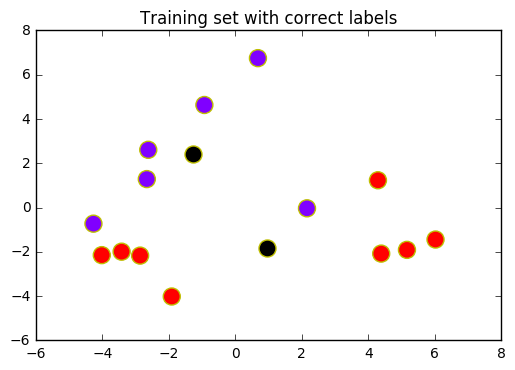

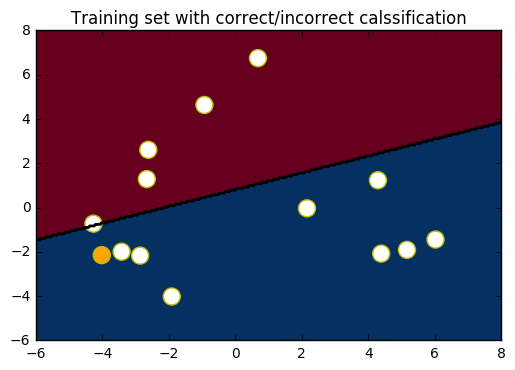

In [18]:
############################################
#### Loading PCA 
from sklearn.decomposition import PCA
## Fitting the model to the data
Xpca = PCA(n_components=2).fit_transform(X12)
pca=PCA(n_components=2)
Xpca=pca.fit_transform(X12)
#############################################
#### Plotting the output
import matplotlib.pyplot as plt
fig = plt.figure()
## Plotting the training data with the correct labels
plt.scatter(Xpca[:, 0], Xpca[:, 1],  s=150, c=Y12,
            cmap=plt.cm.rainbow, edgecolor='y')
## Plotting the mean values per each class
Xmean=pca.transform(model.means_)
plt.scatter(Xmean[:, 0], Xmean[:, 1],  s=150, c='black',
            cmap=plt.cm.rainbow, edgecolor='y')
plt.title("Training set with correct labels")
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
plt.show()
##############################################
#### Classification partition of the space 
nx, ny = 400, 200
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), 
                     np.linspace(y_min, y_max, ny))
Xmesh=pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
Ymesh=model.predict(Xmesh).reshape(xx.shape)
plt.pcolormesh(xx, yy, Ymesh, cmap=plt.cm.RdBu)
plt.contour(xx, yy, Ymesh, [0.5*Ci+0.5*Cj], linewidths=2.
            , colors='k')
###############################################
#### Error for the training set
ErrorColor=['white' if (i==0)  else 'orange' 
            for i in np.absolute(model.predict(X12)-Y12)]
plt.scatter(Xpca[:, 0], Xpca[:, 1],  s=150, c=ErrorColor, 
            cmap=plt.cm.rainbow, edgecolor='y')

plt.title("Training set with correct/incorrect calssification")
# plt.axis('tight')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.show()

## Three-class classification

In this part, we repeat the experiments for three different classes. The linear discriminant analysis should naturally extend to multi-class cases. 

In [19]:
Ck=7
## Choosing respective classes from the training set
Ind12=np.array([ind for ind in range(N) if ((Ytraining[ind]==Ci)
                                            or (Ytraining[ind]==Cj) 
                                            or (Ytraining[ind]==Ck))])
X12=Xtraining[Ind12]
Y12=Ytraining[Ind12]
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("The size of the trainging set with three classes is given by:", len(Ind12))
N12=len(Ind12)
## Choosing respective classes from the test set
Ind12=np.array([ind for ind in range(Ntest) if ((Ytest[ind]==Ci)
                                                or (Ytest[ind]==Cj)
                                                or (Ytest[ind]==Ck))])
Xtest12=Xtest[Ind12]
Ytest12=Ytest[Ind12]
print("The size of the test set with three classes is given by:", len(Ind12))
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
N12test=len(Ind12)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The size of the trainging set with three classes is given by: 24
The size of the test set with three classes is given by: 30
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


We load LDA model once again and fit it to the new data. The performance is measured afterward.

In [20]:
modelII = LDA()
modelII.fit(X12, Y12)
TrainingError=np.count_nonzero(np.array(modelII.predict(X12))-Y12)/N12
TestError=np.count_nonzero(np.array(modelII.predict(Xtest12))-Ytest12)/N12test
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("The misclassification error for the training set is given by:",TrainingError)
print("The misclassification error for the test set is given by:",TestError)
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The misclassification error for the training set is given by: 0.20833333333333334
The misclassification error for the test set is given by: 0.36666666666666664
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


Finally the output is again represented in two-dimensional space using PCA.

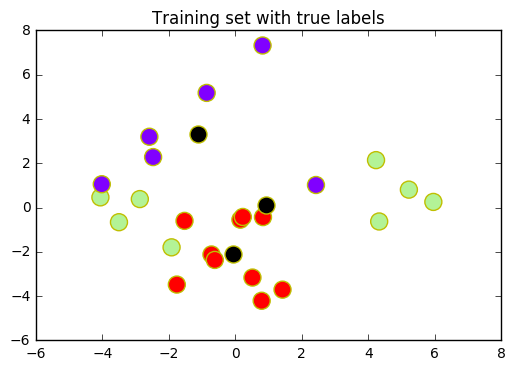

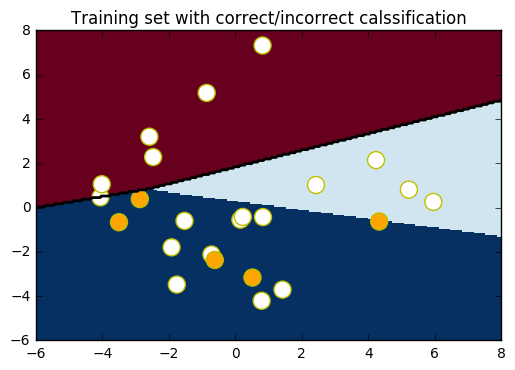

In [21]:
Xpca = PCA(n_components=2).fit_transform(X12)
pca=PCA(n_components=2)
Xpca=pca.fit_transform(X12)
###############################################################
###############################################################
### Plotting
import matplotlib.pyplot as plt
fig = plt.figure()
##############################
# Plot 1
##############################
plt.scatter(Xpca[:, 0], Xpca[:, 1],  s=150, c=Y12, 
            cmap=plt.cm.rainbow, edgecolor='y')
plt.title("Training set with true labels")
Xmean=pca.transform(modelII.means_)
plt.scatter(Xmean[:, 0], Xmean[:, 1],  s=150, c='black', 
            cmap=plt.cm.rainbow, edgecolor='y')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
plt.show()
##############################
# Plot 2
##############################
###################   
## Creating the mesh
nx, ny = 400, 200
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), 
                     np.linspace(y_min, y_max, ny))
Xmesh=pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
Ymesh=modelII.predict(Xmesh).reshape(xx.shape)
plt.pcolormesh(xx, yy, Ymesh, cmap=plt.cm.RdBu)
plt.contour(xx, yy, Ymesh, [0.5*Ci+0.5*Cj], linewidths=2., colors='k')
###################   
ErrorColor=['white' if (i==0)  else 'orange' 
            for i in np.absolute(modelII.predict(X12)-Y12)]
plt.scatter(Xpca[:, 0], Xpca[:, 1],  s=150, c=ErrorColor, 
            cmap=plt.cm.rainbow, edgecolor='y')
plt.title("Training set with correct/incorrect calssification")
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
#######################################################################
#######################################################################
plt.show()


## Multi-class classification

In this part, we just apply Fisher's linear discriminant analysis to multi-class classification. We choose the whole training set for training phase and the algorithm is evaluated on the whole MNIST test set. One can achieve 12.86% error on the training set and 12.7% error on the test set.

In [22]:
###############################################################
## Training set
N=55000
Xtraining = data.train.images
Ytraining = data.train.labels.argmax(axis=1)


## Test set
Ntest=10000
Xtest=data.test.images
Ytest=data.test.labels.argmax(axis=1)



###############################################################
###############################################################
modelIII = LDA()
modelIII.fit(Xtraining, Ytraining)
TrainingError=np.count_nonzero(np.array(modelIII.predict(Xtraining))-Ytraining)/N
TestError=np.count_nonzero(np.array(modelIII.predict(Xtest))-Ytest)/Ntest
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("The misclassification error for the training set is given by:",TrainingError)
print("The misclassification error for the test set is given by:",TestError)
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The misclassification error for the training set is given by: 0.12818181818181817
The misclassification error for the test set is given by: 0.1264
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
